<a href="https://colab.research.google.com/github/iakovkh/mypython/blob/main/LSTM_example21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 4s 18ms/step - loss: 3.2569 - val_loss: 2.7239
Epoch 2/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 2.6539 - val_loss: 2.6158
Epoch 3/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 2.6480 - val_loss: 2.4240
Epoch 4/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5641 - val_loss: 2.5217
Epoch 5/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.4208 - val_loss: 2.3678
Epoch 6/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 2.5539 - val_loss: 2.2800
Epoch 7/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - loss: 2.3615 - val_loss: 2.3627
Epoch 8/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 2.5800 - val_loss: 2.2217
Epoch 9/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 2.3662 - val_loss: 2.3740
Epoch 10/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 2.4170 - val_loss: 2.2336
Epoch 11/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.4623 - val_loss: 2.2178
Epoch 12/500
40/40 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss

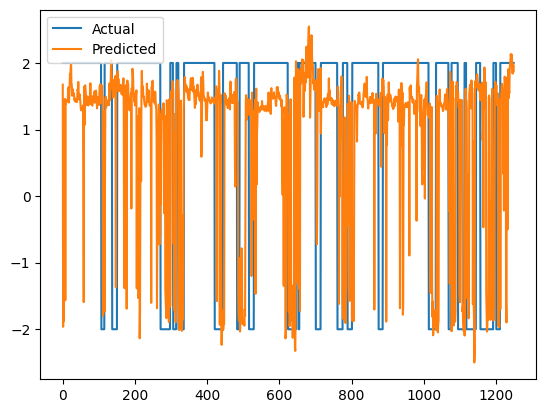

Correlation: 0.3468471226768818


In [8]:
# Configuration Section
data_file_name = '/content/sample_data/NN_cut.xlsx'
validate_file_name = '/content/sample_data/NN_contol_0.xlsx'
actual_file_name = '/content/sample_data/NN_contol.xlsx'
output_file_name = 'output.xlsx'
train_split = 0.5
normalize = False
number_of_layers = 7
number_of_neurons = 11
optimizer = 'adam'  # Other options: 'sgd', 'rmsprop', 'adagrad', 'adadelta', 'adamax', 'nadam'
loss_function = 'mean_squared_error'  # Other options: 'mean_absolute_error', 'mean_absolute_percentage_error', 'mean_squared_logarithmic_error'
activation = 'relu'  # Other options: 'sigmoid', 'tanh', 'softmax', 'softplus', 'softsign', 'elu', 'selu', 'exponential'
epochs = 500
tolerance = 0.001

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

# Step I - General data preparation
class MyMatrix:
    def __init__(self):
        self.data = None

    def read_data_from_file(self, file_name):
        # Step 1.17 - Read data from xlsx file
        self.data = pd.read_excel(file_name)

    def normalize_data(self):
        # Step 1.18 - Normalize each column into range 0 to 1
        scaler = MinMaxScaler()
        self.data = pd.DataFrame(scaler.fit_transform(self.data), columns=self.data.columns)

    def display_console(self, column=None):
        # Step 1.19 - Display full data set or a specific column
        if column:
            print(self.data[column])
        else:
            print(self.data)

    def display_visual(self, column=None):
        # Step 1.20 - Display full data set or a specific column in a chart
        if column:
            plt.plot(self.data[column])
            plt.title(f'Column: {column}')
            plt.show()
        else:
            for col in self.data.columns:
                plt.figure()
                plt.plot(self.data[col])
                plt.title(f'Column: {col}')
                plt.show()

# Step II – Read and prepare data
# Step 2.5 - Create an object MyData of MyMatrix class
MyData = MyMatrix()

# Step 2.6 - Read the data into variable MyData from the data_file_name
MyData.read_data_from_file(data_file_name)

# Step 2.8 - Use first 80% of the data for next actions and keep 20% of data for testing
train_size = int(len(MyData.data) * train_split)
train_data = MyData.data.iloc[:train_size]
test_data = MyData.data.iloc[train_size:]

# Step 2.9 - Normalize the data
if normalize:
    MyData.normalize_data()

# Step III – Design the neural network
# Step 3.2 - Create a back propagation neural network
model = Sequential()
model.add(Input(shape=(train_data.shape[1] - 1,)))
for _ in range(number_of_layers):
    model.add(Dense(number_of_neurons, activation=activation))
model.add(Dense(1))

# Compile the model
model.compile(optimizer=optimizer, loss=loss_function)

# Prepare the data
X_train = train_data.iloc[:, 1:].values
y_train = train_data.iloc[:, 0].values
X_test = test_data.iloc[:, 1:].values
y_test = test_data.iloc[:, 0].values

# Step 3.3 - Train the network
history = model.fit(X_train, y_train, epochs=epochs, validation_data=(X_test, y_test), verbose=1)

# Step IV - Testing results
# Step 4.6 - Calculate the values in column 1 using just trained neural network
predictions = model.predict(X_test)

# Save the calculated values to the file output.xlsx
output_df = pd.DataFrame({'Predicted': predictions.flatten(), 'Actual': y_test})
output_df.to_excel(output_file_name, index=False)

# Step 4.8 - Visualize columns 1 and 2 from the output file in a chart
plt.figure()
plt.plot(output_df['Actual'], label='Actual')
plt.plot(output_df['Predicted'], label='Predicted')
plt.legend()
plt.show()

# Step 4.9 - Calculate the correlation between values in column 1 and column 2 and print it out
correlation = np.corrcoef(output_df['Actual'], output_df['Predicted'])[0, 1]
print(f'Correlation: {correlation}')

# Step 4.10 - Correct the warning
# The warning is corrected by using Input(shape) as the first layer in the model, which is already implemented above.
